<a href="https://colab.research.google.com/github/Segrey372017/pytorch_fatsai_sandbox/blob/main/pytorch_fastai_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Глава 1. Путешествие в мир глубокого обучения

### Ваша первая модель (cats vs dogs)

https://course.fast.ai/Resources/book.html


In [2]:
from fastai.vision.all import *
from fastai.tabular.all import *


In [3]:
import ipywidgets as widgets
import dill
from pathlib import Path

In [ ]:
!python -m pip list | grep fast

fastai                        2.7.7
fastcore                      1.5.13
fastdownload                  0.0.7
fastdtw                       0.3.4
fastjsonschema                2.16.1
fastprogress                  1.0.3
fastrlock                     0.8


In [ ]:
path = untar_data(URLs.PETS, '/images')

In [ ]:
def is_cat(x):
    return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), 
                                      valid_pct = 0.2, seed = 42,
                                      label_func = is_cat, item_tfms = Resize(224))

In [ ]:
learn = vision_learner(dls, resnet34, metrics = error_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
#learn.fine_tune(1)

In [ ]:
#with open("learn_cats_dogs.pkl", "wb") as f:
#    pickle.dump(learn, f)

In [ ]:
learn2 = None
with open('/content/drive/MyDrive/Colab Notebooks/learn_cats_dogs.pkl', "rb") as f:
    learn2 = pickle.load(f)

In [ ]:
del learn

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(upload.data[0])

In [ ]:
is_cat, _, prob = learn2.predict(img)
print(f"Is this a cat? {is_cat}")
print(f"Cat probability {prob[1].item():0.6f}")

Is this a cat? True
Cat probability 0.999944


### Сегментация изображения

In [ ]:
path = untar_data(URLs.CAMVID_TINY, '/content/camvid_tiny')

In [ ]:
path

Path('/root/.fastai/data/camvid_tiny')

In [ ]:
dls = SegmentationDataLoaders.from_label_func(path, bs = 8, 
                                              fnames = get_image_files(path/'images'), # перегружен оператор / можно без конкатенации
                                              label_func = lambda o: path /"labels"/f"{o.stem}_P{o.suffix}",
                                              codes = np.loadtxt(path /'codes.txt', dtype = 'str'))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [ ]:
learn = unet_learner(dls, resnet34)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The cur

In [ ]:
#learn.fine_tune(4)

epoch,train_loss,valid_loss,time
0,2.848903,2.458210,01:13


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,1.813387,1.490754,01:16
1,1.547214,1.163790,01:19
2,1.365776,1.008272,01:15
3,1.237163,0.932938,01:17


In [ ]:
#with open("/content/drive/MyDrive/Colab Notebooks/learn_segm.dill", "wb") as f:
# dill.dump(learn, f)

In [ ]:
learn2 = None
with open("/content/drive/MyDrive/Colab Notebooks/learn_segm.dill", "rb") as f:
    learn2 = dill.load(f)

In [ ]:
#del learn

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


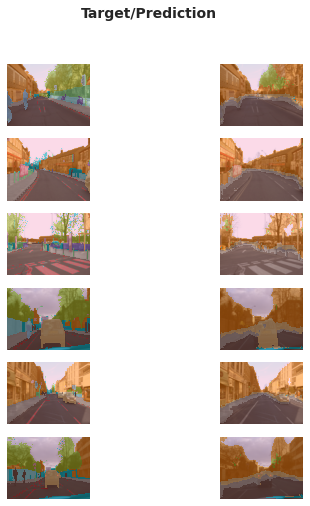

In [ ]:
learn2.show_results(max_n = 6, figsize=(7,8))

### Табличные данные (уровень дохода)

In [ ]:
#from fastai.tabular import *

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE, '/content/adult_sample')

In [ ]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
learn = tabular_learner(dls, metrics = accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.381589,0.357553,0.840295,00:05
1,0.367507,0.353663,0.836609,00:05
2,0.358220,0.342677,0.839527,00:05


# Глава 2. От модели к продакшену

### Классификация изображений (pizza - not_pizza)

In [ ]:
path = Path('/content/drive/MyDrive/datasets/pizza_not_pizza')

In [ ]:
pizza = DataBlock(blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(valid_pct= 0.2, seed = 42),
                  get_y = parent_label,
                  item_tfms= Resize(128))

In [ ]:
dls = pizza.dataloaders(path)

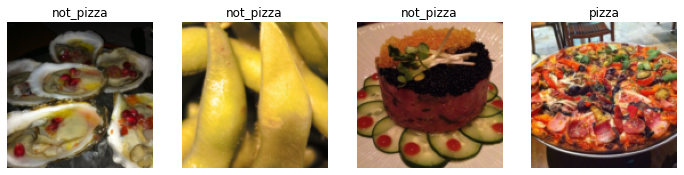

In [ ]:
dls.valid.show_batch(max_n = 4, nrows = 1)

In [ ]:
pizza = pizza.new(
    item_tfms= RandomResizedCrop(224, min_scale=0.5),
    batch_tfms= aug_transforms()
)

In [ ]:
dls = pizza.dataloaders(path)

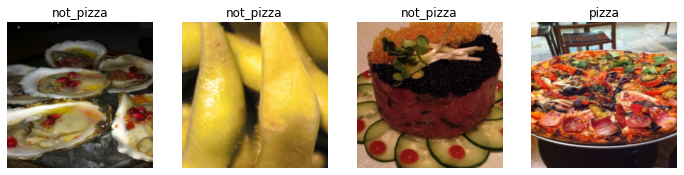

In [ ]:
dls.valid.show_batch(max_n = 4, nrows = 1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
#learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.712797,0.284371,0.075802,04:17


epoch,train_loss,valid_loss,error_rate,time
0,0.343811,0.237159,0.087464,05:23
1,0.309996,0.177761,0.055394,05:23
2,0.245414,0.144399,0.040816,05:24
3,0.201458,0.141617,0.046647,05:23


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/learn_pizza.dill', 'wb') as f:
    dill.dump(learn, f)

In [ ]:
del learn

In [ ]:
learn_p = None
with open('/content/drive/MyDrive/Colab Notebooks/learn_pizza.dill', 'rb') as f:
    learn_p = dill.load(f)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_p)

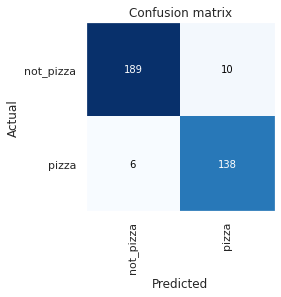

In [ ]:
interp.plot_confusion_matrix()

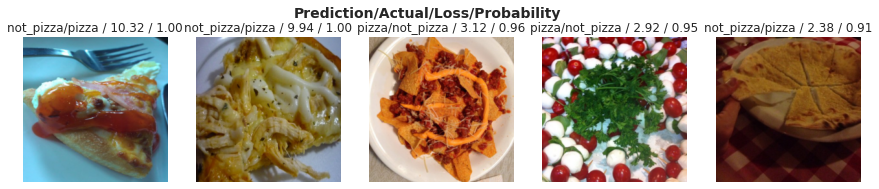

In [ ]:
interp.plot_top_losses(5, nrows = 1)

In [ ]:
learn_p.predict('/content/drive/MyDrive/datasets/pizza_valid/some_pizza.jpg') # должен распознать как pizza

('pizza', TensorBase(1), TensorBase([1.4771e-08, 1.0000e+00]))

In [ ]:
# яичница очень похожа на пиццу, справится ли
learn_p.predict('/content/drive/MyDrive/datasets/pizza_valid/some_eggs.jpg') # должен распознать как not_pizza

('not_pizza', TensorBase(0), TensorBase([0.6765, 0.3235]))

Справился но вероятность 67% против 32%

In [ ]:
img = PILImage.create('/content/drive/MyDrive/datasets/pizza_valid/some_eggs.jpg')

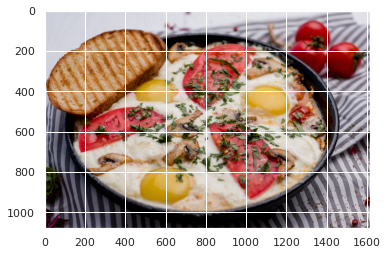

In [ ]:
plt.imshow(img)

# Глава 4. Обучение классификатора цифр. Взгляд изнутри

### Набор MNIST

In [4]:
path = untar_data(URLs.MNIST_SAMPLE,'/content/MNIST')

In [5]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [6]:
(path / 'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [7]:
trees = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train'/ '7').ls().sorted()

In [8]:
trees

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [9]:
img_path = trees[1]

In [10]:
img3 = Image.open(img_path)

In [11]:
img3

In [12]:
# Преобразование в массив numpy
np.array(img3)[4:10, 4:10] # извлекатся срез 4х10

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [13]:
# преобразование в тензр Pytorch
tensor(img3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [14]:
img_3t = tensor(img3)

In [15]:
df = pd.DataFrame(data = img_3t[4:15, 4:22])

In [16]:
df.style.set_properties(**{'font_size': '6pt'}).background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [17]:
# Базовая модель (сходство пикселей)
seven_tensors = [tensor(Image.open(o)) for o in sevens]
thres_tensors = [tensor(Image.open(o)) for o in trees]

In [18]:
len(seven_tensors), len(thres_tensors)

(6265, 6131)

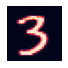

In [19]:
show_image(thres_tensors[1])

In [20]:
# упаковка изображений в трехмерный тензор
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(thres_tensors).float() / 255

In [21]:
stacked_threes.shape

torch.Size([6131, 28, 28])

<h3>ВАЖНО!!! </h3>
<h3> <i><b> Ранг -</i></b>  колличество осей в тензоре </h3>
<h3> <i><b> Форма (shape) -</i></b>  размер каждой оси тензора </h3>

In [22]:
# ранг тензора
stacked_sevens.ndim

3

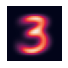

In [23]:
# идеальная цифра 3 (усредненное значение каждого пикселя из датасета)
mean3 = stacked_threes.mean(0)
show_image(mean3)

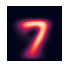

In [24]:
# "идеальная семерка"
mean7 = stacked_sevens.mean(0)
show_image(mean7)

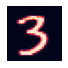

In [25]:
a_3 = stacked_threes[1]
show_image(a_3)

In [26]:
# оценка меры L1 и L2 (расстояние между идеальной цифрой 3 и одим из вариантов написания)
dist3_abs = (a_3 - mean3).abs().mean()
dist3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist3_abs, dist3_sqr

(tensor(0.1114), tensor(0.2021))

In [27]:
dist7_abs = (a_3 - mean7).abs().mean()
dist7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist7_abs, dist7_sqr
# ожидаемо что случайная трока оказалас дальше от идеальной семерки чем от идеальной тройки

(tensor(0.1586), tensor(0.3021))

### Случайный градиентный спуск (SGD)

In [28]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [29]:
train_y = tensor([1]*len(trees)+[0]*len(sevens)).unsqueeze(1)

In [30]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [31]:
dset = list(zip(train_x,train_y))

In [32]:
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [33]:
valid3_tens = torch.stack([tensor(Image.open(o)) for o in (path / 'valid'/'3').ls()])
valid7_tens = torch.stack([tensor(Image.open(o)) for o in (path/ 'valid'/ '7').ls()])

valid3_tens = valid3_tens.float() / 255
valid7_tens = valid7_tens.float() / 255

In [34]:
valid3_tens.shape, valid7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [35]:
# набор валидационных данных
valid_x = torch.cat([valid3_tens, valid7_tens]).view(-1, 28*28)

In [36]:
valid_y = tensor([0]*len(valid3_tens)+[1]*len(valid7_tens)).unsqueeze(1)

In [37]:
valid_dset = list(zip(valid_x, valid_y))

In [38]:
# инициализация весов случайными значениями
def init_params(size, std = 1.0):
    return (torch.randn(size)*std).requires_grad_()

In [39]:
weights = init_params((28*28,1))
bias = init_params(1)

In [40]:
(train_x[0]*weights.T).sum() + bias

tensor([-9.0795], grad_fn=<AddBackward0>)

In [41]:
def linear1(xb, weights, bias):
    return xb@weights+bias

In [42]:
preds = linear1(train_x, weights, bias)
preds

tensor([[ -9.0796],
        [-16.4581],
        [ -3.5531],
        ...,
        [ -3.8017],
        [  1.3042],
        [  0.4215]], grad_fn=<AddBackward0>)

In [43]:
corrects = (preds > 0).float() == train_y

In [44]:
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [False],
        [False]])

In [45]:
corrects.float().mean().item()

0.4496611952781677

In [46]:
# изменяем веса на небольшое значение
with torch.no_grad(): weights[0] *= 1.0001

In [47]:
preds = linear1(train_x, weights, bias)
((preds>0.0).float() == train_y).float().mean().item()

0.4496611952781677

In [48]:
# функция потерь
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [49]:
def batch_accuracy(xb, yb): 
    """
    Функция вычисления точности предсказания по пакету данных
    """
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [50]:
dl = DataLoader(dset, batch_size= 256)
valid_dl = DataLoader(valid_dset, bath_size = 256)

In [51]:
dls = DataLoaders(dl, valid_dl)

In [52]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [53]:
learn.fit(10, lr =1.0)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637028,0.496581,0.504416,00:02
1,0.508366,0.791275,0.183513,00:02
2,0.187574,0.832968,0.150638,00:02
3,0.082552,0.898383,0.085869,00:02
4,0.043865,0.924914,0.065751,00:02
5,0.028745,0.939421,0.051521,00:02
6,0.022519,0.948460,0.044652,00:02
7,0.019739,0.954488,0.037782,00:02
8,0.018322,0.958750,0.033857,00:02
9,0.017469,0.961911,0.031894,00:02


In [54]:
# Простая нейронная сеть
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [55]:
learn = Learner(dls, simple_net, opt_func = SGD,
                loss_func = mnist_loss, metrics = batch_accuracy)

In [56]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.316777,0.591344,0.495093,00:02
1,0.147824,0.772411,0.194308,00:02
2,0.081682,0.885314,0.083415,00:02
3,0.053551,0.922033,0.060353,00:02
4,0.040536,0.938897,0.045633,00:02
5,0.033903,0.948447,0.035819,00:02
6,0.030106,0.954514,0.034838,00:02
7,0.027643,0.958668,0.033366,00:02
8,0.025871,0.961698,0.031894,00:03
9,0.024497,0.964008,0.028950,00:02


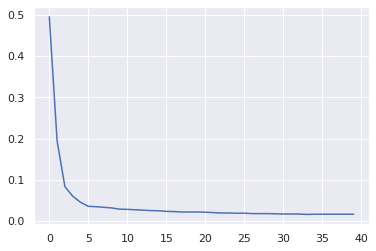

In [59]:
plt.plot(L(learn.recorder.values).itemgot(2)) # кривая обучения

In [64]:
# результат последней эпохи обучения
learn.recorder.values[-1][1]

0.9791644215583801